In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Read data 

In [2]:
json_path = 'data\Subtyping-Staging-Purity-FGA.json'
data = json.load(open(json_path, 'r'))

In [3]:
categorical_data = defaultdict(lambda: defaultdict(int))
continuous_data = defaultdict(list)

In [4]:
for _, tasks in data.items():
    for task_name, task_data in tasks.items():
        if task_name == "lung-cancer-subtyping" or task_name == "AJCC_PATHOLOGIC_TUMOR_STAGE_reduced":
            categorical_data[task_name][task_data['label']] += 1            
        else:
            continuous_data[task_name].append(task_data['label'])

print(categorical_data["lung-cancer-subtyping"])
print((categorical_data['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']))
print(len(continuous_data['purity']))
print(len(continuous_data['FRACTION_GENOME_ALTERED']))


defaultdict(<class 'int'>, {'lusc': 166, 'normal': 92, None: 8, 'luad': 146})
defaultdict(<class 'int'>, {'Early Stage': 258, None: 105, 'Late Stage': 49})
412
412


## Purity Distribution

In [5]:
purity_values = continuous_data["purity"]

In [6]:
# Get non-null values
filtered_purity_values = [value for value in purity_values if value is not None]
num_null_values = len(purity_values) - len(filtered_purity_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_purity_values)}")

Number of null values: 14
Number of non-null values: 398


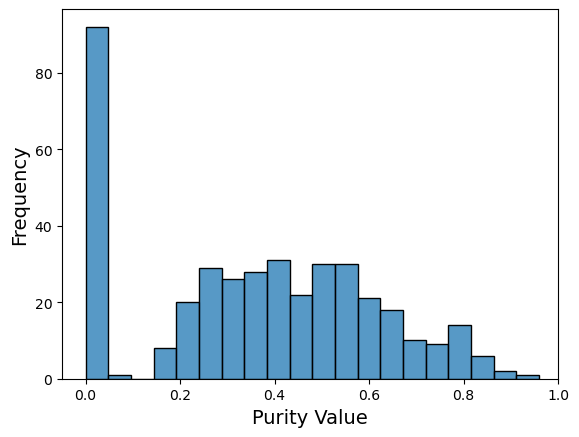

In [38]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_purity_values, ax=axes, bins=20)
axes.set_xlabel('Purity Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of Purity (Excluding Null Values)", wrap=True,fontsize=14)
plt.show()

## FGA Distribution

In [39]:
fga_values = continuous_data["FRACTION_GENOME_ALTERED"]

In [40]:
filtered_fga_values = [value for value in fga_values if value is not None]
num_null_values = len(purity_values) - len(filtered_fga_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_fga_values)}")

Number of null values: 101
Number of non-null values: 311


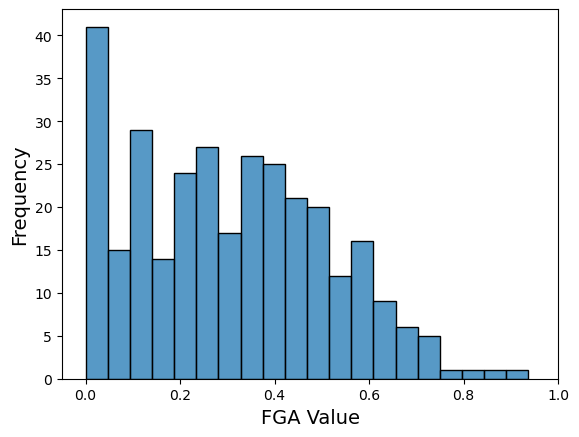

In [42]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_fga_values, ax=axes, bins=20)
axes.set_xlabel('FGA Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of FGA (Excluding Null Values)", wrap=True,fontsize=14)
plt.show()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

## Purity-FGA

In [43]:
purity_values = []
fga_values = []

for key, value in data.items():
    purity = value.get("purity", {}).get("label")
    fga = value.get("FRACTION_GENOME_ALTERED", {}).get("label")
    
    if purity is not None and fga is not None:
        purity_values.append(purity)
        fga_values.append(fga)



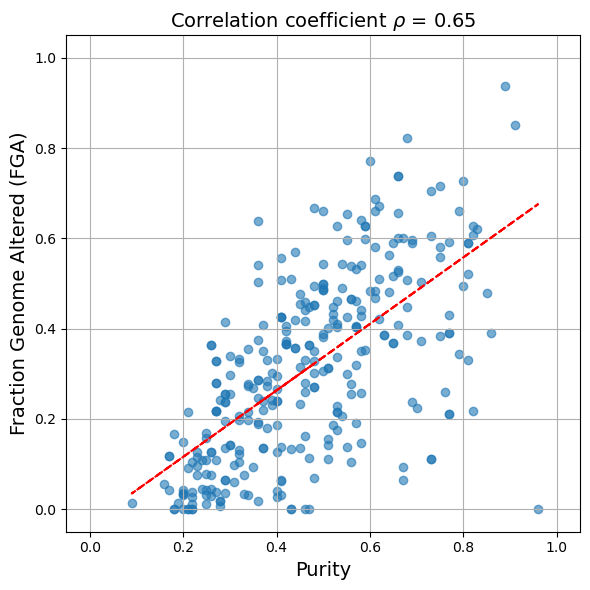

In [44]:
fit = np.polyfit(purity_values, fga_values, 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(6, 6))
plt.scatter(purity_values, fga_values, alpha=0.6)
plt.plot(purity_values, fit_fn(purity_values), 'r--')

plt.xlim((-0.05, 1.05))
plt.xticks(np.arange(0, 1.05, 0.2))
plt.ylim((-0.05, 1.05))
plt.yticks(np.arange(0, 1.05, 0.2))
plt.title(r"Correlation coefficient $\rho$ = 0.65", fontsize=14)
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Fraction Genome Altered (FGA)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Calculating the correlation coefficient
correlation_coefficient = np.corrcoef(purity_values, fga_values)[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.6456014713971948


## Categorical values

In [34]:
subtyping_df = pd.DataFrame.from_dict(categorical_data['lung-cancer-subtyping'], orient='index', columns=['Count'])
subtyping_df = subtyping_df.sort_values('Count', ascending=False)
print(subtyping_df)

        Count
lusc      166
luad      146
normal     92
None        8


In [35]:
staging_df = pd.DataFrame.from_dict(categorical_data['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'], orient='index', columns=['Count'])
staging_df = staging_df.sort_values('Count', ascending=False)
print(staging_df)

             Count
Early Stage    258
None           105
Late Stage      49


## Staging-Purity

In [7]:
excel_file_path = r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\data\label_stats_processed.xlsx'

staging_df = pd.read_excel(excel_file_path, sheet_name='staging labels', index_col=0)

staging_df.head(10)


,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,purity,FRACTION_GENOME_ALTERED
Sample,,,
0,Early Stage,0.48,0.2702
1,Early Stage,0.48,0.2702
2,NaN,0.00,NaN
3,NaN,0.00,NaN
4,Early Stage,0.29,0.2552
5,Early Stage,0.29,0.2552
6,NaN,0.00,NaN
7,NaN,0.00,NaN
8,Late Stage,0.77,0.3907


In [16]:
staging_df.dropna(subset=['purity', 'FRACTION_GENOME_ALTERED','AJCC_PATHOLOGIC_TUMOR_STAGE_reduced' ], inplace=True)
staging_df

,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,purity,FRACTION_GENOME_ALTERED
Sample,,,
0,Early Stage,0.48,0.2702
1,Early Stage,0.48,0.2702
4,Early Stage,0.29,0.2552
5,Early Stage,0.29,0.2552
8,Late Stage,0.77,0.3907
...,...,...,...
407,Late Stage,0.53,0.3365
408,Early Stage,0.50,0.5443
409,Late Stage,0.52,0.4490


In [65]:
df_early_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']
df_late_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']


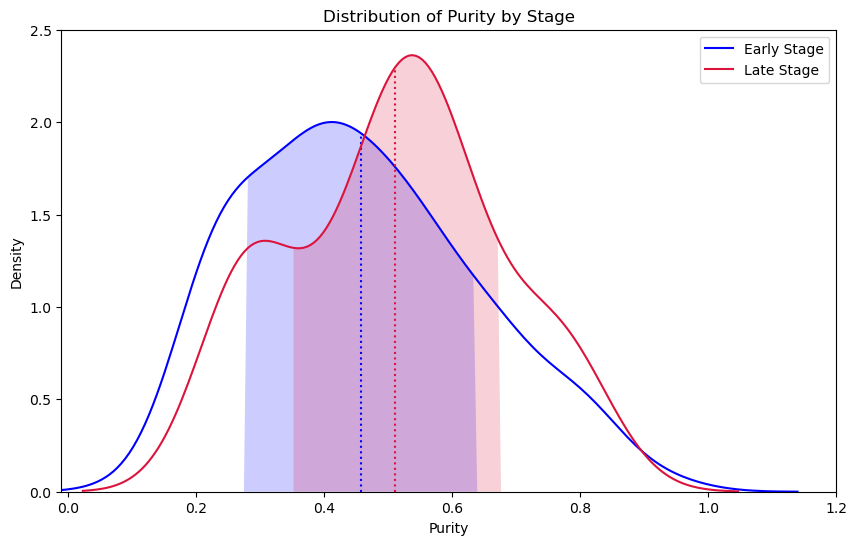

In [17]:
# Let's combine both plots into a single figure.

plt.figure(figsize=(10, 6))

# Early Stage Plot
early_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']['purity']
sns.kdeplot(early_stage, color="blue", fill=False, label='Early Stage')
early_mean = early_stage.mean()
early_std = early_stage.std()
kdeline = plt.gca().lines[0]  # Get the first line in the current axes
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# Late Stage Plot
late_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']['purity']
sns.kdeplot(late_stage, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage.mean()
late_std = late_stage.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(-0.01, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of Purity by Stage')
plt.xlabel('Purity')
plt.ylabel('Density')
plt.legend()

plt.show()


In [181]:
early_stage.to_csv('purity_early_stage.csv')
late_stage.to_csv('purity_late_stage.csv')

- For the early stage, this peak is centered around a lower purity value than the late stage, suggesting that early-stage tumors tend to have lower purity on average.
- The early-stage tumor distribution appears to have a tighter spread (smaller standard deviation), while the late-stage tumor distribution is more spread out (larger standard deviation). This implies that tumor purity varies more widely in late-stage tumors than in early-stage tumors.
- Skewness: The late-stage distribution appears slightly right-skewed, meaning there's a tail extending towards higher purity values. .


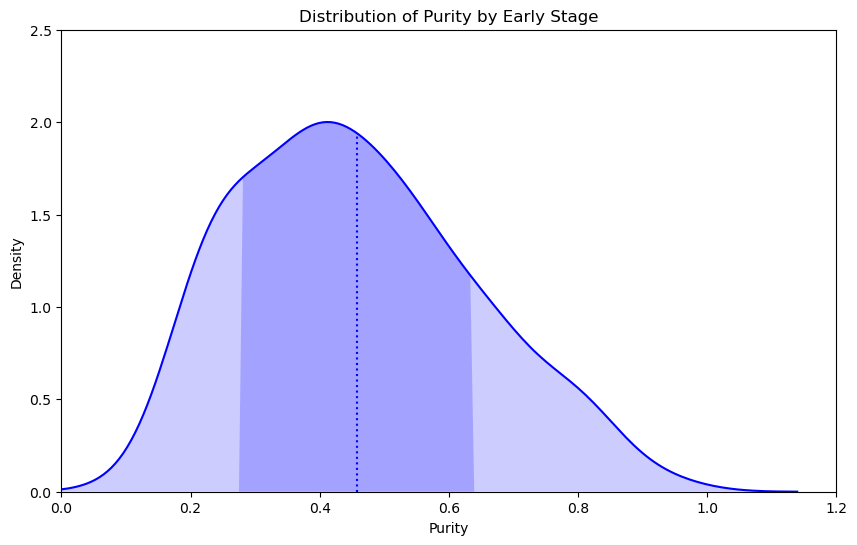

In [87]:
plt.figure(figsize=(10, 6))

early_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']['purity']
ax = sns.kdeplot(early_stage, color="blue", fill=False, label='Early Stage')
early_mean = early_stage.mean()
early_std = early_stage.std()
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of Purity by Early Stage')
plt.xlabel('Purity')
plt.ylabel('Density')

plt.show()


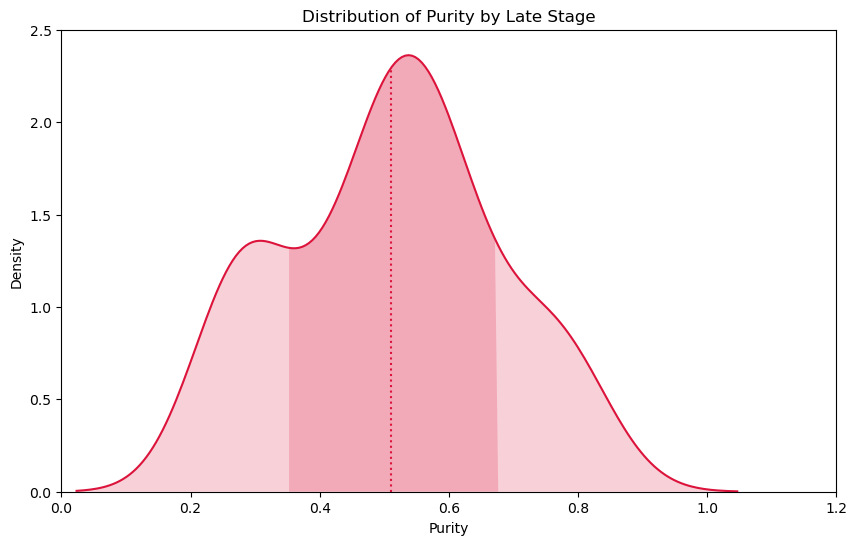

In [86]:
plt.figure(figsize=(10, 6))

late_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']['purity']
ax2 = sns.kdeplot(late_stage, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage.mean()
late_std = late_stage.std()
kdeline2 = ax2.lines[0]
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, facecolor='crimson', alpha=0.2)
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of Purity by Late Stage')
plt.xlabel('Purity')
plt.ylabel('Density')
# plt.legend(title='Tumor Stage')

plt.show()

In [92]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway

early_stage_df = pd.read_csv('purity_early_stage.csv')
late_stage_df = pd.read_csv('purity_late_stage.csv')

# Shapiro-Wilk test for normality
sw_early = shapiro(early_stage_df['purity'])
sw_late = shapiro(late_stage_df['purity'])

# Levene's test for equality of variances
levene_test = levene(early_stage_df['purity'], late_stage_df['purity'])

# Two-sample t-test/Welch's test for comparing means (will decide based on Levene's test result)
# Note: We'll use Welch's test if variances are not equal, as it does not assume equal population variance.
if levene_test.pvalue < 0.05:
    # Variances are not equal, use Welch's test
    t_test_result = ttest_ind(early_stage_df['purity'], late_stage_df['purity'], equal_var=False)
else:
    # Variances are equal, use standard t-test
    t_test_result = ttest_ind(early_stage_df['purity'], late_stage_df['purity'], equal_var=True)

# Mann-Whitney U test for comparing medians if the data is not normally distributed
mwu_test_result = mannwhitneyu(early_stage_df['purity'], late_stage_df['purity'])

# Output the results
sw_early, sw_late, levene_test, t_test_result, mwu_test_result

(ShapiroResult(statistic=0.973863422870636, pvalue=0.00012821723066736013),
 ShapiroResult(statistic=0.9453601837158203, pvalue=0.02857477404177189),
 LeveneResult(statistic=1.308736472914193, pvalue=0.2535385750004869),
 Ttest_indResult(statistic=-1.8754737127112748, pvalue=0.06170194820861281),
 MannwhitneyuResult(statistic=4800.5, pvalue=0.033057079461260075))

1. **Normality Test (Shapiro-Wilk) Results**:
   - Early-stage purity: p-value = 0.000128, which suggests that the data does not come from a normally distributed population.
   - Late-stage purity: p-value = 0.02857, which also suggests that the data may not come from a normally distributed population.

Since both p-values are less than the common alpha level of 0.05, we reject the null hypothesis for normality. Therefore, the assumption of normality is violated for both early and late-stage tumor purity data.

2. **Equality of Variances Test (Levene's) Result**:
   - p-value = 0.25354, which is greater than 0.05, suggesting that there is no significant difference in variances between the two groups. We fail to reject the null hypothesis for equal variances.

3. **Two-Sample t-Test/Welch's t-Test for Comparing Means**:
   - Since the Levene's test did not show a significant difference in variances, we used the standard t-test for equal variances.
   - The t-test result shows a p-value of 0.06170, which is slightly above the common alpha level of 0.05, suggesting that there is no significant difference in the means of tumor purity between early and late stages at the 5% significance level.

4. **Mann-Whitney U Test for Comparing Medians**:
   - p-value = 0.03306, which is less than 0.05, indicating that there is a statistically significant difference in the distribution of tumor purity between early and late stages.

To sum up, while the t-test for comparing means did not show a significant difference at the 5% significance level, the Mann-Whitney U test did find a significant difference in the distribution of tumor purity between the two stages, which may suggest a difference in median values. However, given the violation of the normality assumption, the results from the Mann-Whitney U test may be more reliable in this context. The lack of significant difference in variances and the significant result from the Mann-Whitney U test support your original observation that early-stage tumors tend to have lower purity with less variability compared to late-stage tumors.

The hypothesis that early-stage tumors tend to have lower tumor purity can be tested using a one-sided Mann-Whitney U test since the normality assumption is not met. The one-sided Mann-Whitney U test will test the hypothesis that one distribution is stochastically greater than the other, which in this context means it will test whether the median of tumor purity in the late-stage group is statistically greater than the median of the early-stage group.

Here's how to set up the hypothesis test:

- **Null Hypothesis (H0)**: The median tumor purity of early-stage tumors is greater than or equal to that of late-stage tumors (i.e., there is no difference or early-stage is higher).
- **Alternative Hypothesis (H1)**: The median tumor purity of early-stage tumors is less than that of late-stage tumors (i.e., early-stage tumors have lower purity).

The Mann-Whitney U test previously performed was two-tailed. To make it one-tailed, which is more suitable for our specific hypothesis, we can divide the p-value by 2. If this adjusted p-value is less than the significance level (commonly 0.05), we would reject the null hypothesis in favor of the alternative hypothesis.

Let's compute the one-sided p-value using the results from the Mann-Whitney U test.

The one-tailed p-value from the Mann-Whitney U test is approximately 0.01653, which is less than the common significance level of 0.05. Therefore, we reject the null hypothesis in favor of the alternative hypothesis that the median tumor purity of early-stage tumors is less than that of late-stage tumors. This result supports the hypothesis that early-stage tumors tend to have lower tumor purity.

In [93]:
# One-tailed p-value from the Mann-Whitney U test
one_tailed_p_value = mwu_test_result.pvalue / 2

# Test statistic from the Mann-Whitney U test
mwu_test_statistic = mwu_test_result.statistic

one_tailed_p_value, mwu_test_statistic


(0.016528539730630037, 4800.5)

## Staging-FGA

In [97]:
early_stage_fga = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']['FRACTION_GENOME_ALTERED']
late_stage_fga = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']['FRACTION_GENOME_ALTERED']

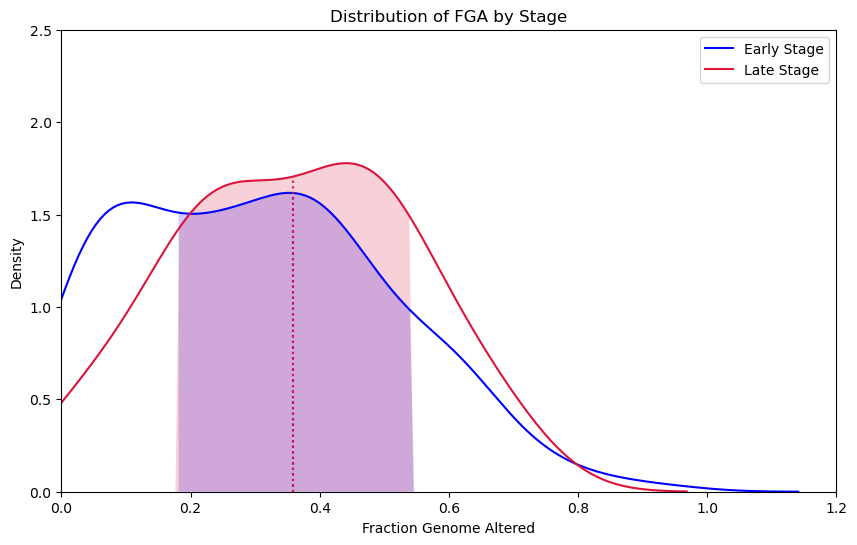

In [98]:
plt.figure(figsize=(10, 6))

sns.kdeplot(early_stage_fga, color="blue", fill=False, label='Early Stage')
early_mean = late_stage_fga.mean()
early_std = late_stage_fga.std()
kdeline = plt.gca().lines[0]  
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# Late Stage Plot
sns.kdeplot(late_stage_fga, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage_fga.mean()
late_std = late_stage_fga.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson',  ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of FGA by Stage')
plt.xlabel('Fraction Genome Altered')
plt.ylabel('Density')
plt.legend()

plt.show()


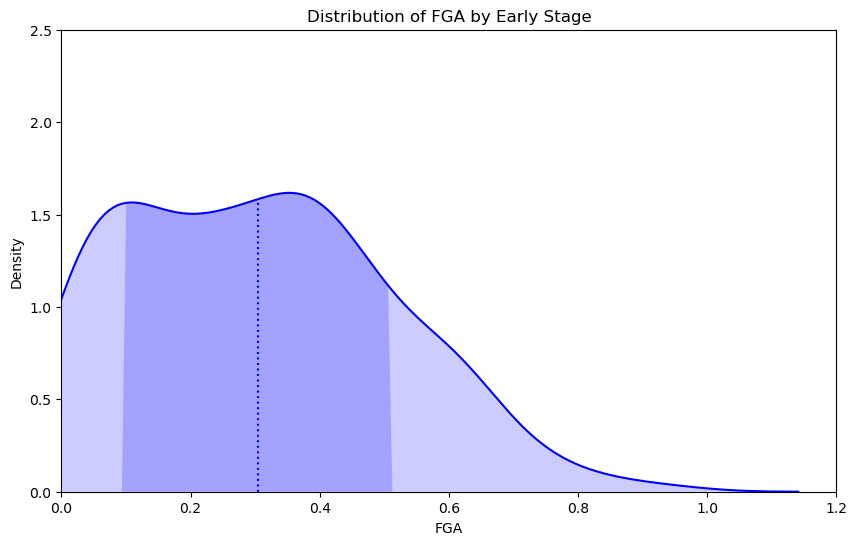

In [99]:
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(early_stage_fga, color="blue", fill=False, label='Early Stage')
early_mean = early_stage_fga.mean()
early_std = early_stage_fga.std()
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of FGA by Early Stage')
plt.xlabel('FGA')
plt.ylabel('Density')

plt.show()


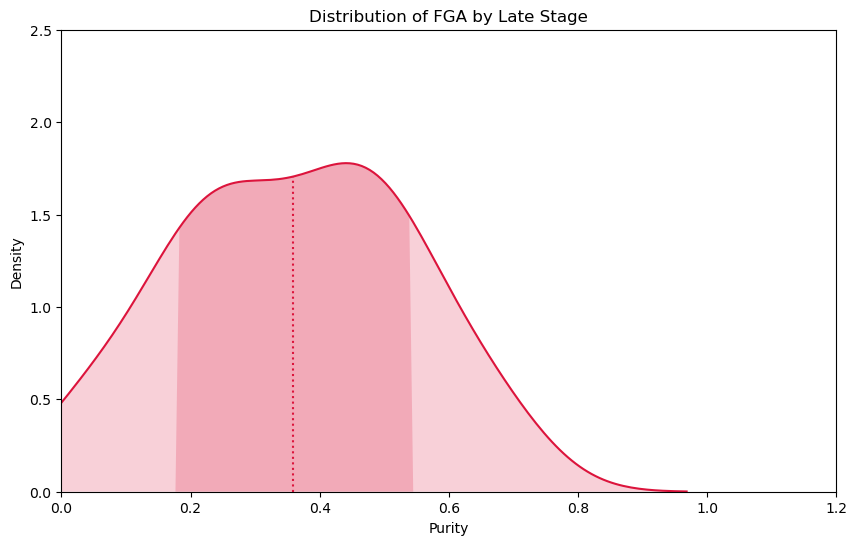

In [100]:
plt.figure(figsize=(10, 6))

ax2 = sns.kdeplot(late_stage_fga, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage_fga.mean()
late_std = late_stage_fga.std()
kdeline2 = ax2.lines[0]
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, facecolor='crimson', alpha=0.2)
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

plt.title('Distribution of FGA by Late Stage')
plt.xlabel('Purity')
plt.ylabel('Density')
# plt.legend(title='Tumor Stage')

plt.show()

In [101]:
early_stage_fga.to_csv('fga_early_stage.csv')
late_stage_fga.to_csv('fga_late_stage.csv')

- Central peak of early stage is lower than late stage -> early stage on average has smaller FGA than late stage
- while FGA increases with tumor stage, there is not a complete distinction between the stages based on FGA alone 

In [102]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway

early_stage_fga = pd.read_csv('fga_early_stage.csv')
late_stage_fga = pd.read_csv('fga_late_stage.csv')

# Shapiro-Wilk test for normality
sw_early = shapiro(early_stage_fga['FRACTION_GENOME_ALTERED'])
sw_late = shapiro(late_stage_fga['FRACTION_GENOME_ALTERED'])

# Levene's test for equality of variances
levene_test = levene(early_stage_fga['FRACTION_GENOME_ALTERED'], late_stage_fga['FRACTION_GENOME_ALTERED'])

# Two-sample t-test/Welch's test for comparing means (will decide based on Levene's test result)
# Note: We'll use Welch's test if variances are not equal, as it does not assume equal population variance.
if levene_test.pvalue < 0.05:
    # Variances are not equal, use Welch's test
    t_test_result = ttest_ind(early_stage_fga['FRACTION_GENOME_ALTERED'], late_stage_fga['FRACTION_GENOME_ALTERED'], equal_var=False)
else:
    # Variances are equal, use standard t-test
    t_test_result = ttest_ind(early_stage_fga['FRACTION_GENOME_ALTERED'], late_stage_fga['FRACTION_GENOME_ALTERED'], equal_var=True)

# Mann-Whitney U test for comparing medians if the data is not normally distributed
mwu_test_result = mannwhitneyu(early_stage_fga['FRACTION_GENOME_ALTERED'], late_stage_fga['FRACTION_GENOME_ALTERED'])

# Output the results
sw_early, sw_late, levene_test, t_test_result, mwu_test_result

(ShapiroResult(statistic=0.9660038352012634, pvalue=9.865222637017723e-06),
 ShapiroResult(statistic=0.9793562293052673, pvalue=0.5659384727478027),
 LeveneResult(statistic=1.111409057097411, pvalue=0.29262700056326707),
 Ttest_indResult(statistic=-1.6890404987374878, pvalue=0.09225414815587203),
 MannwhitneyuResult(statistic=4916.0, pvalue=0.05483287423920461))

1. **Normality Test (Shapiro-Wilk) Results**:
- For the early-stage FGA data, the test statistic is 0.966 and the p-value is approximately \(9.87 \times 10^{-6}\). Since the p-value is less than 0.05, we reject the null hypothesis that the data is normally distributed. This indicates that the early-stage FGA data does not follow a normal distribution.
- For the late-stage FGA data, the test statistic is 0.979 and the p-value is approximately 0.566. Here, the p-value is greater than 0.05, so we fail to reject the null hypothesis, suggesting that the late-stage FGA data could be considered normally distributed.

1. **Equality of Variances Test (Levene's) Result**:
   - p-value = 0.29263, which is greater than 0.05, suggesting that the variances of the FGA data for the early and late stages are not significantly different. This implies that it is reasonable to use statistical tests that assume equal variances.

2. **Two-Sample t-Test/Welch's t-Test for Comparing Means**:
   The t-test statistic is -1.689 and the p-value is 0.09225, which is greater than the conventional alpha level of 0.05. This means we do not reject the null hypothesis that the means of the two distributions are equal. There is no significant difference in the mean FGA values between early and late-stage tumors at the 5% significance level.

3. **Mann-Whitney U Test for Comparing Medians**:
   - The Mann-Whitney U test statistic is 4916.0 and the p-value is 0.05483, which is just above 0.05. This suggests that there is not a statistically significant difference in the distributions of the FGA values between early and late-stage tumors at the 5% level. However, the p-value is very close to the threshold, indicating that there might be a difference that is close to being considered statistically significant.

There is a suggestion (though not statistically significant at the 5% level) from the Mann-Whitney U test that the distribution of FGA values may differ between the two stages, which could warrant further investigation or might indicate a trend that could become significant with a larger sample size or at a slightly higher alpha level.